In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import random
from sklearn.metrics import accuracy_score
random.seed(10)
from google.colab import files
d = pd.read_csv('heart.csv')

In [ ]:
class1amount = d.loc[d.chd == 1, 'chd'].count()
class0amount = d.loc[d.chd == 0, 'chd'].count()
rows = len(d.axes[0])
percentclass1 = (class1amount/rows)*100
percentclass0 = (class0amount/rows)*100
print("The number of samples is " + str(rows))
print("The number of samples is " + str(len(d)))
print("The number of 1's is " + str(class1amount))
print("The number of 0's is " + str(class0amount))
print("The percentage of class 1 is " + str(percentclass1))
print("The percentage of class 0 is " + str(percentclass0))

The number of samples is 462
The number of samples is 462
The number of 1's is 160
The number of 0's is 302
The percentage of class 1 is 34.63203463203463
The percentage of class 0 is 65.36796536796537


In [ ]:
print(d.isnull().values.any())
print(d.isnull().sum())
# both lines check the entire data set for any missing values, the first sweeps the entire set and returns True or False depending
# on whether there are any missing and the second checks how many missing in each column

False
row.names    0
sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64


In [ ]:
d.select_dtypes(include=['object', 'category']).columns.tolist()

['famhist']

In [ ]:
d.nunique()

row.names    462
sbp           62
tobacco      214
ldl          329
adiposity    408
famhist        2
typea         54
obesity      400
alcohol      249
age           49
chd            2
dtype: int64

In [ ]:
correlationMatrix = d.corr()
correlationMatrix

,row.names,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
row.names,1.000000,0.171583,-0.044813,-0.064014,0.033851,-0.147769,-0.026758,0.088825,-0.014064,-0.063808
sbp,0.171583,1.000000,0.212247,0.158296,0.356500,-0.057454,0.238067,0.140096,0.388771,0.192354
tobacco,-0.044813,0.212247,1.000000,0.158905,0.286640,-0.014608,0.124529,0.200813,0.450330,0.299718
ldl,-0.064014,0.158296,0.158905,1.000000,0.440432,0.044048,0.330506,-0.033403,0.311799,0.263053
adiposity,0.033851,0.356500,0.286640,0.440432,1.000000,-0.043144,0.716556,0.100330,0.625954,0.254121
typea,-0.147769,-0.057454,-0.014608,0.044048,-0.043144,1.000000,0.074006,0.039498,-0.102606,0.103156
obesity,-0.026758,0.238067,0.124529,0.330506,0.716556,0.074006,1.000000,0.051620,0.291777,0.100095
alcohol,0.088825,0.140096,0.200813,-0.033403,0.100330,0.039498,0.051620,1.000000,0.101125,0.062531
age,-0.014064,0.388771,0.450330,0.311799,0.625954,-0.102606,0.291777,0.101125,1.000000,0.372973
chd,-0.063808,0.192354,0.299718,0.263053,0.254121,0.103156,0.100095,0.062531,0.372973,1.000000


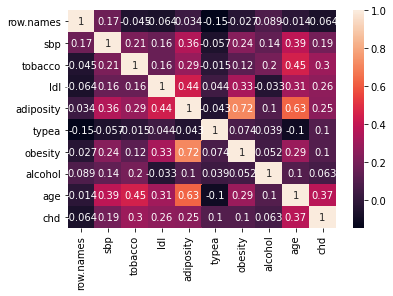

In [ ]:
sn.heatmap(correlationMatrix, annot = True)
plt.show()

As shown by the correlation matrix there seems to be no significan negative correlation to consider, therefore the use of absolute values would make no difference here. There is noteable strong positive correlation between adiposity and obesity, moderate positive correlation between adiposty and age, and low positive correlation between tobacco and age. The aforementioned 3 pairings are the 3 most correlative. 

In [ ]:
pd.get_dummies(data=d, columns=['famhist'])

,row.names,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd,famhist_Absent,famhist_Present
0,1,160,12.00,5.73,23.11,49,25.30,97.20,52,1,0,1
1,2,144,0.01,4.41,28.61,55,28.87,2.06,63,1,1,0
2,3,118,0.08,3.48,32.28,52,29.14,3.81,46,0,0,1
3,4,170,7.50,6.41,38.03,51,31.99,24.26,58,1,0,1
4,5,134,13.60,3.50,27.78,60,25.99,57.34,49,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,64,28.45,0.00,58,0,1,0
458,460,182,4.20,4.41,32.10,52,28.61,18.72,52,1,1,0
459,461,108,3.00,1.59,15.23,40,20.09,26.64,55,0,1,0
460,462,118,5.40,11.61,30.79,64,27.35,23.97,40,0,1,0


In [ ]:
df = pd.get_dummies(data=d, columns=['famhist'])

In [ ]:
stancol = ['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']
ds = d['row.names']
dsa = d[stancol].apply(lambda x: (x - x.mean()) / (x.std()))
ds = pd.concat([ds,dsa], axis = 1)
ds = pd.concat([ds,df['famhist_Absent'],df['famhist_Present'],d['chd']], axis = 1)
print(ds)
print(str(len(ds)))

     row.names       sbp   tobacco  ...  famhist_Absent  famhist_Present  chd
0            1  1.057417  1.821099  ...               0                1    1
1            2  0.276789 -0.789382  ...               1                0    1
2            3 -0.991731 -0.774141  ...               0                1    0
3            4  1.545310  0.841352  ...               0                1    1
4            5 -0.211103  2.169453  ...               0                1    1
..         ...       ...       ...  ...             ...              ...  ...
457        459  3.692037 -0.704470  ...               1                0    0
458        460  2.130781  0.122871  ...               1                0    1
459        461 -1.479624 -0.138395  ...               1                0    0
460        462 -0.991731  0.384137  ...               1                0    0
461        463 -0.308682 -0.791559  ...               0                1    1

[462 rows x 12 columns]
462


In [ ]:
def sigmoidfunc(x):
  hx = (1)/(1+(np.exp(-x))) #hypothesis function using numpy
  return hx

In [ ]:
def accuracy2(thetao, thetai, x, y):
  ypred = (1)/(1+(np.exp(np.dot(thetai.T, x) + thetao)))
  count = (ypred > 0.5).astype(int)
  return np.sum((count == y)/462)

In [ ]:
x = ds[['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age', 'famhist_Absent', 'famhist_Present']]
y = ds['chd']
x = x.values
y = y.values
x = x.T
y = y.reshape(1 , x.shape[1])

In [ ]:
def graddescent(x,y,alpha,epoch):
  error=[]
  size = x.shape[1] 
  thetai = np.random.rand(x.shape[0])
  thetao = np.random.rand()
  for i in range (epoch):
    h = sigmoidfunc((np.dot(thetai.T, x)) + thetao)
    errorfunction = (-1/size) * np.sum(y * np.log(h) + (1-y) * np.log(1-h))
    PDm = (1/(size)) * np.dot((h - y), x.T)
    PDb = (1/(size)) * np.sum(h - y)
    thetai = thetai - (alpha * PDm.T)
    thetao = thetao - (alpha * PDb)
    error.append(errorfunction)
    ac2 = accuracy2(thetao, thetai, x, y)
  print("accuracy: ", ac2)
  return thetai, thetao, error


accuracy:  3.569264069264069


(0.0, 500.0)

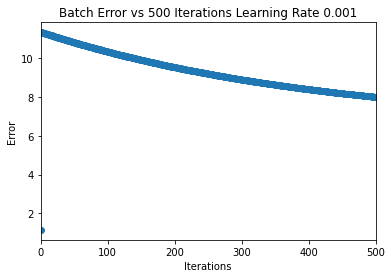

In [ ]:
epoch = 500
alpha = 0.001
thetai, thetao, error = graddescent(x,y,alpha,epoch)
plt.title('Batch Error vs 500 Iterations Learning Rate 0.001')
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.scatter(range(epoch), error)
plt.xlim([0, 500])

accuracy:  3.1731601731601735


(0.0, 1000.0)

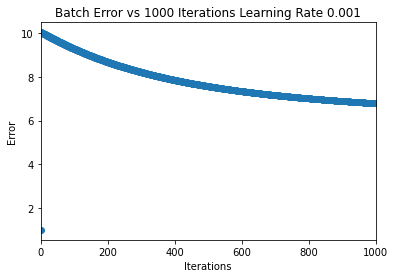

In [ ]:
epoch = 1000
alpha = 0.001
thetai, thetao, error = graddescent(x,y,alpha,epoch)
plt.title('Batch Error vs 1000 Iterations Learning Rate 0.001')
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.scatter(range(epoch), error)
plt.xlim([0, 1000])

accuracy:  2.621212121212121


(0.0, 10000.0)

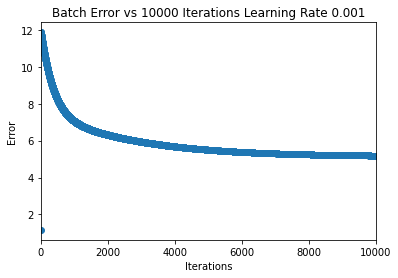

In [ ]:
epoch = 10000
alpha = 0.001
thetai, thetao, error = graddescent(x,y,alpha,epoch)
plt.title('Batch Error vs 10000 Iterations Learning Rate 0.001')
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.scatter(range(epoch), error)
plt.xlim([0, 10000])

accuracy:  3.74025974025974


(0.0, 500.0)

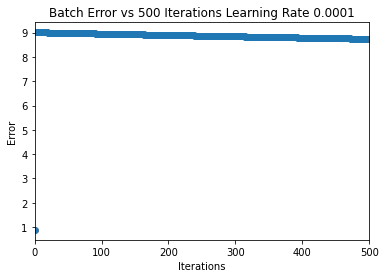

In [ ]:
epoch = 500
alpha = 0.0001
thetai, thetao, error = graddescent(x,y,alpha,epoch)
plt.title('Batch Error vs 500 Iterations Learning Rate 0.0001')
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.scatter(range(epoch), error)
plt.xlim([0, 500])

accuracy:  3.6969696969696972


(0.0, 1000.0)

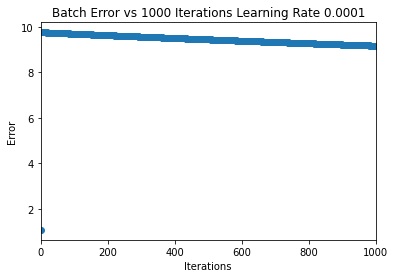

In [ ]:
epoch = 1000
alpha = 0.0001
thetai, thetao, error = graddescent(x,y,alpha,epoch)
plt.title('Batch Error vs 1000 Iterations Learning Rate 0.0001')
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.scatter(range(epoch), error)
plt.xlim([0, 1000])

accuracy:  3.1731601731601735


(0.0, 10000.0)

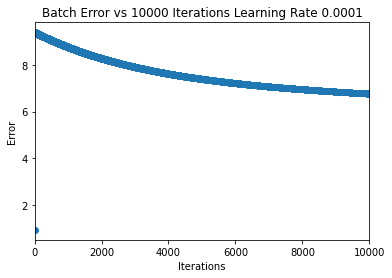

In [ ]:
epoch = 10000
alpha = 0.0001
thetai, thetao, error = graddescent(x,y,alpha,epoch)
plt.title('Batch Error vs 10000 Iterations Learning Rate 0.0001')
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.scatter(range(epoch), error)
plt.xlim([0, 10000])

In [ ]:
x1 = ds[['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age', 'famhist_Absent', 'famhist_Present']]
y1 = ds['chd']
x1 = x1.values
y1 = y1.values
x1 = x1.T
y1 = y1.reshape(1 , x1.shape[1])

In [ ]:
def minibatchgraddescent(x,y,epoch,batchsize1,alpha):
  error=[]
  epoch_list= []
  size = x.shape[1] 
  thetai = np.random.rand(x1.shape[0])
  thetao = np.random.rand()
  for i in range (epoch):
    randomsam = np.random.randint(0, x.shape[0])
    xsam = x1[randomsam:randomsam+batchsize1]
    ysam = y1[randomsam:randomsam+batchsize1]
    h = sigmoidfunc((np.dot(thetai.T, x)) + thetao)
    errorfunction = (-1/size) * np.sum(y * np.log(h) + (1-y) * np.log(1-h))
    PDm = (1/(size)) * np.dot((h - y), x.T)
    PDb = (1/(size)) * np.sum(h - y)
    thetai = thetai - (alpha * PDm.T)
    thetao = thetao - (alpha * PDb)
    error.append(errorfunction)
    ac2 = accuracy2(thetao, thetai, x, y)
  print("accuracy: ", ac2)
  return thetai, thetao, errorfunction, error

accuracy:  3.357142857142857


(0.0, 500.0)

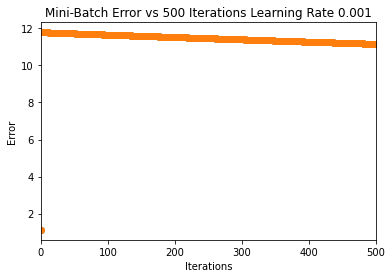

In [ ]:
minibatchgraddescent(x,y,epoch=500,batchsize1=50,alpha=0.001)
plt.scatter(range(epoch), error)
plt.title('Mini-Batch Error vs 500 Iterations Learning Rate 0.001')
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.scatter(range(epoch), error)
plt.xlim([0, 500])

accuracy:  3.2445887445887447


(0.0, 1000.0)

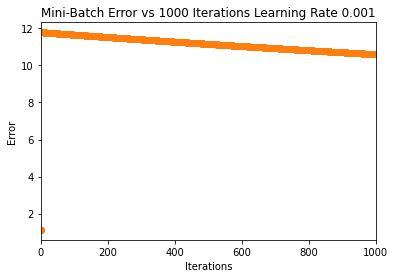

In [ ]:
minibatchgraddescent(x,y,epoch=1000,batchsize1=50,alpha=0.001)
plt.scatter(range(epoch), error)
plt.title('Mini-Batch Error vs 1000 Iterations Learning Rate 0.001')
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.scatter(range(epoch), error)
plt.xlim([0, 1000])

accuracy:  2.6428571428571432


(0.0, 10000.0)

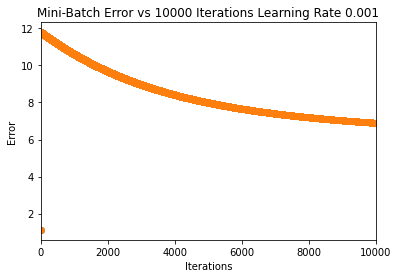

In [ ]:
minibatchgraddescent(x,y,epoch=10000,batchsize1=50,alpha=0.001)
plt.scatter(range(epoch), error)
plt.title('Mini-Batch Error vs 10000 Iterations Learning Rate 0.001')
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.scatter(range(epoch), error)
plt.xlim([0, 10000])

accuracy:  4.824675324675325


(0.0, 500.0)

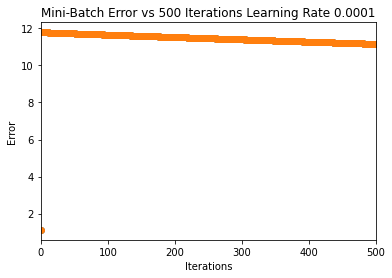

In [ ]:
minibatchgraddescent(x,y,epoch=500,batchsize1=50,alpha=0.0001)
plt.scatter(range(epoch), error)
plt.title('Mini-Batch Error vs 500 Iterations Learning Rate 0.0001')
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.scatter(range(epoch), error)
plt.xlim([0, 500])

accuracy:  3.642857142857143


(0.0, 1000.0)

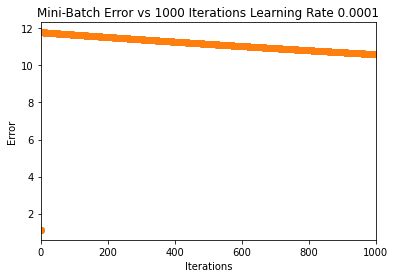

In [ ]:
minibatchgraddescent(x,y,epoch=1000,batchsize1=50,alpha=0.0001)
plt.scatter(range(epoch), error)
plt.title('Mini-Batch Error vs 1000 Iterations Learning Rate 0.0001')
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.scatter(range(epoch), error)
plt.xlim([0, 1000])

accuracy:  3.183982683982684


(0.0, 10000.0)

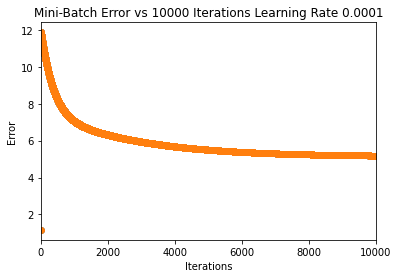

In [ ]:
minibatchgraddescent(x,y,epoch=10000,batchsize1=50,alpha=0.0001)
plt.scatter(range(epoch), error)
plt.title('Mini-Batch Error vs 10000 Iterations Learning Rate 0.0001')
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.scatter(range(epoch), error)
plt.xlim([0, 10000])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

dsk = pd.read_csv('heart.csv')
scaler = StandardScaler()
OHA    = OneHotEncoder(sparse=False)
categ  = ['famhist']
numer = ['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']

# Scale and Encode Separate Columns
snumer  = scaler.fit_transform(dsk[numer]) 
encodcateg =  OHA.fit_transform(dsk[categ])

# Concatenate (Column-Bind) Processed Columns Back Together
dsk2 = np.concatenate([snumer, encodcateg], axis=1)
LR = LogisticRegression()
LR.fit(xsklr, ysklr)
ysklrpred = LR.predict(xsklr)
acusklr = accuracy_score(ysklr,ysklrpred)
print("Accuracy: ",acusklr*100)


Accuracy:  63.41991341991342
